# Module-2

## Query 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock.
This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
plt.style.use("grayscale")
warnings.filterwarnings("ignore")
import seaborn as sns

df=pd.read_csv("week2.csv")
df.Date.dtype

dtype('O')

In [2]:
df["Date"]=pd.to_datetime(df["Date"])
df.Date.dtype

dtype('<M8[ns]')

In [3]:
df.set_index("Date", inplace=True)

Text(0.5, 1.0, 'Closing price of each of the days for the entire time frame')

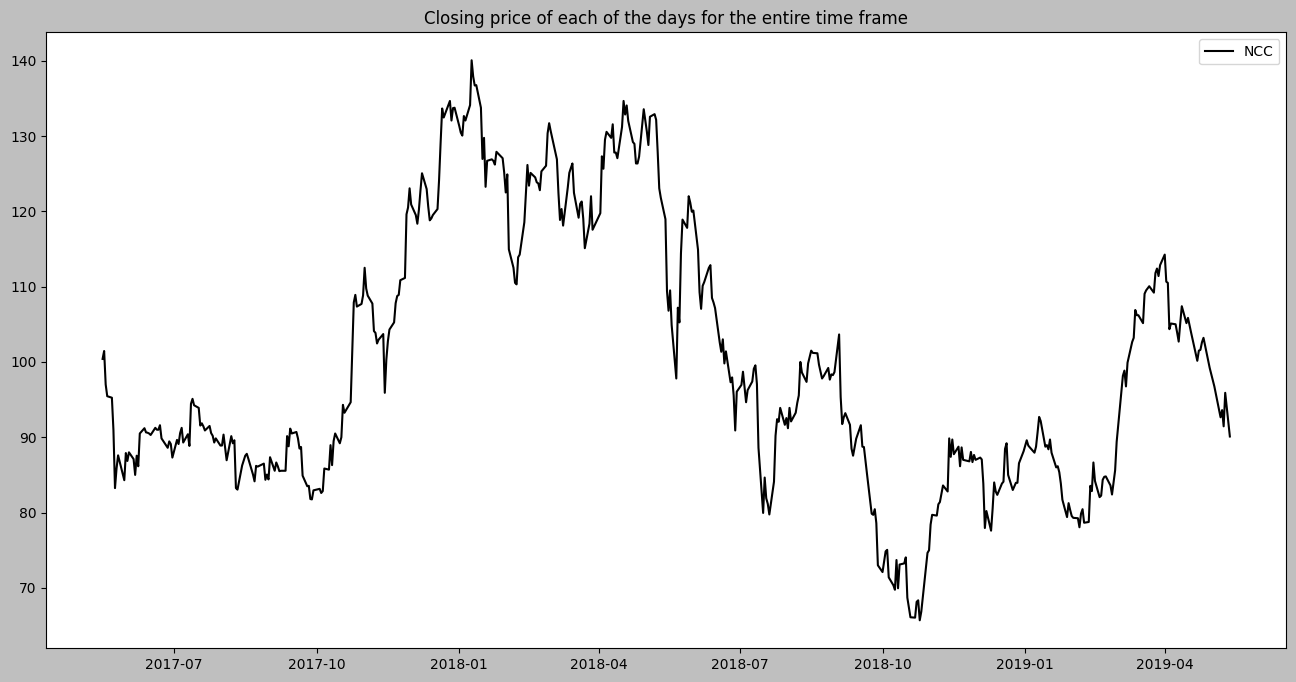

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df["Close Price"], label="NCC")
plt.legend()
plt.title("Closing price of each of the days for the entire time frame")

In [5]:
df["Close Price"].diff().abs().sort_values(ascending=True).tail(10)

Date
2018-09-04    8.30
2017-11-28    8.45
2018-07-13    8.45
2018-07-16    8.65
2019-03-05    8.75
2018-05-24    9.15
2018-05-22    9.40
2018-05-15    9.55
2018-02-02    9.95
2017-05-16     NaN
Name: Close Price, dtype: float64

### Printing news for 3 dates since 6 dates has no news 
#### Obtaining news from Money Control

##### News for 2018-05-24
NCC Q4 profit jumps 61% to Rs 103 cr, targets 45% growth in FY19 topline. The company has targeted to achieve 45 percent growth in topline for the year 2018-19 from Rs 7,560 crore to Rs 11,000 crore.

##### News for 2018-07-16
Buy or sell: Top stock trading ideas by market experts which are good short term bets.
NCC Q1 PAT seen up 54.7% YoY to Rs. 98.1 cr: ICICI Direct

##### News for 2017-11-28
Expect earnings to improve due to fastrack orders: NCC
"We are looking at further reduction of finance cost and for that, we are talking to banks to restructure working capital loan," YD Murthy, Executive VP-Finance of NCC said.

## Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using
the plt.stem() function.
Display a stem plot of the daily change in of the stock price in percentage. This column was
calculated in module 1 and should be already available in week2.csv. Observe whenever there's
a large change.

Text(0.5, 1.0, 'Daily change in of the stock price in percentage')

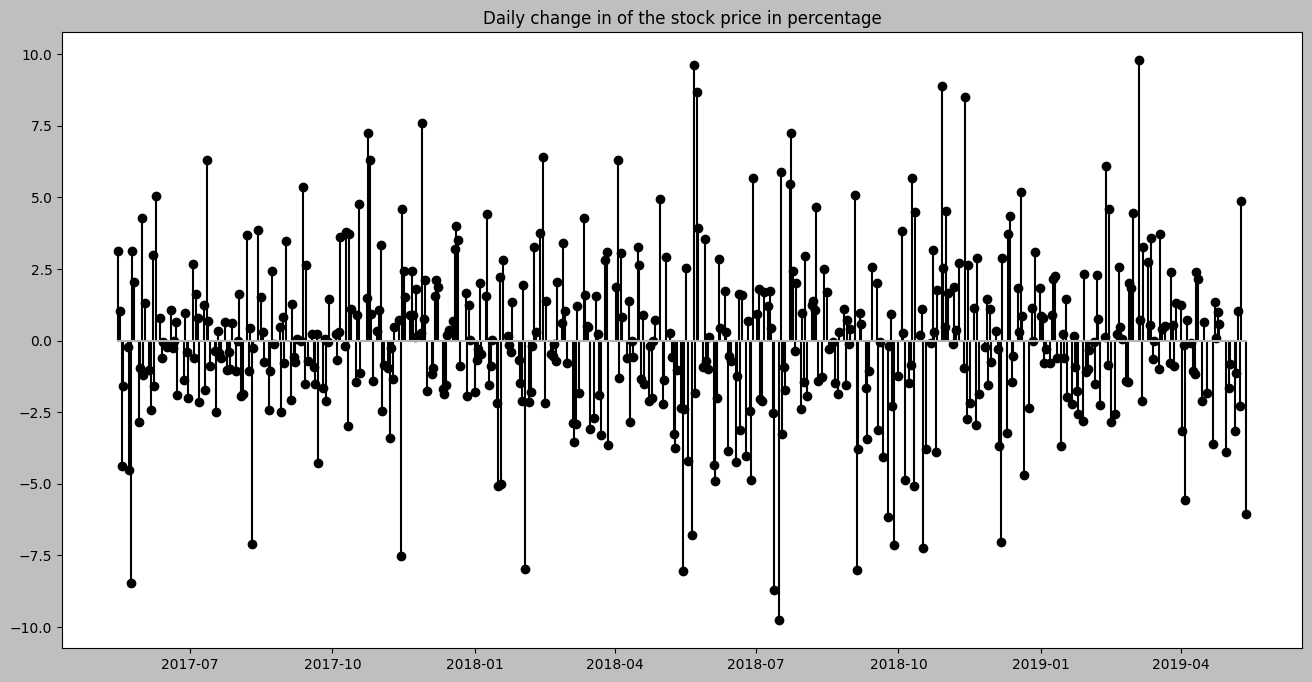

In [6]:
plt.figure(figsize=(16,8))
plt.stem(df.index, df["Day_Perc_Change"])
plt.title("Daily change in of the stock price in percentage")

## Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your
analysis of the relationship between volume and daily percentage change.

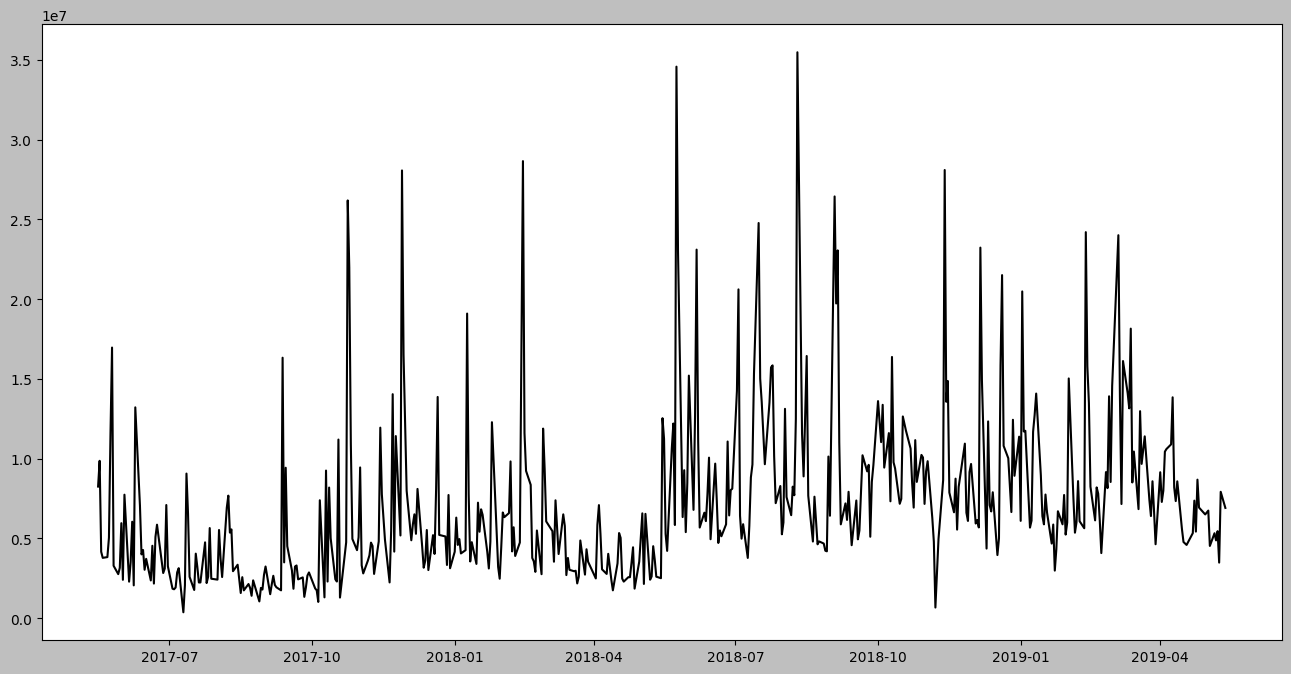

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df["Total Traded Quantity"])

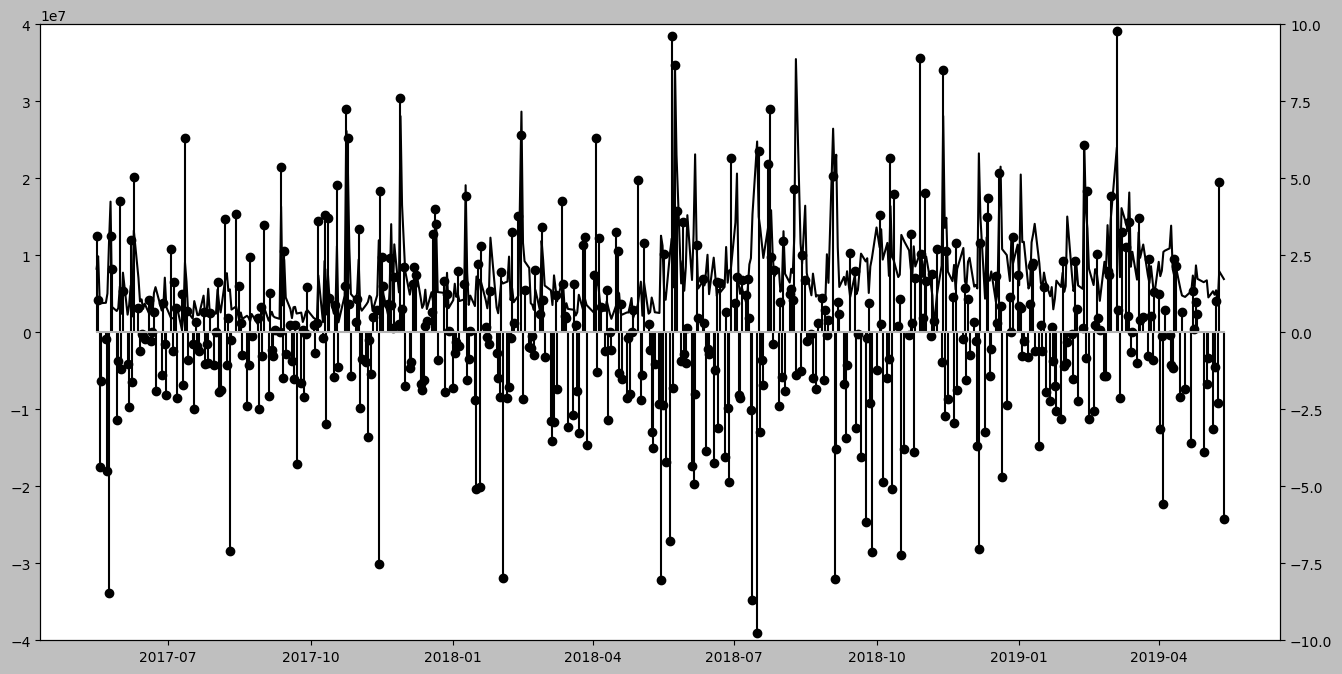

In [8]:
fig, ax=plt.subplots(figsize=(16,8))
ax.plot(df["Total Traded Quantity"], label="Total Traded Quantity")
ax.set_ylim(top=40000000, bottom=-40000000)
ax2=ax.twinx()
ax2.stem(df.index, df["Day_Perc_Change"])
ax2.set_ylim(top=10, bottom=-10)
plt.show()

### Explaination:
I have found there is some simultaneous relationship between Daily Percent Change and Trading volume and indicate that information may flow simultaneously rather than sequential into the market. The graph revealed that shocks in the price impact trading volume in the expected direction over the short horizion. It is evident that daily percent change moves in accordingly with trading activity in the primary market.

## Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type
occurs. This can be seen as a pie chart, with each sector representing the percentage of days
each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each
trend. You can use the groupby function with the trend column to group all days with the same
trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot
of average & median values of the 'Total Traded Quantity' by Trend type.

<Axes: ylabel='count'>

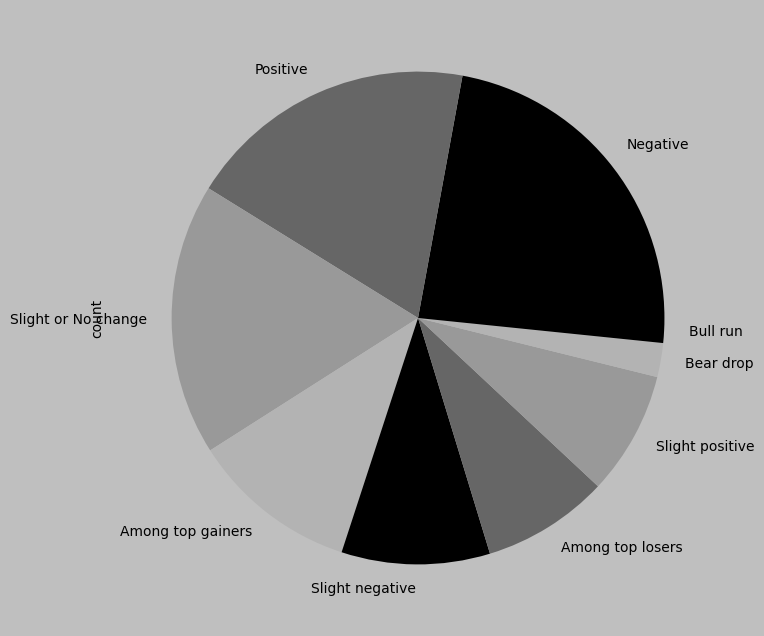

In [9]:
plt.figure(figsize=(16,8))
df.Trend.value_counts().plot(kind="pie")

<Axes: xlabel='Trend'>

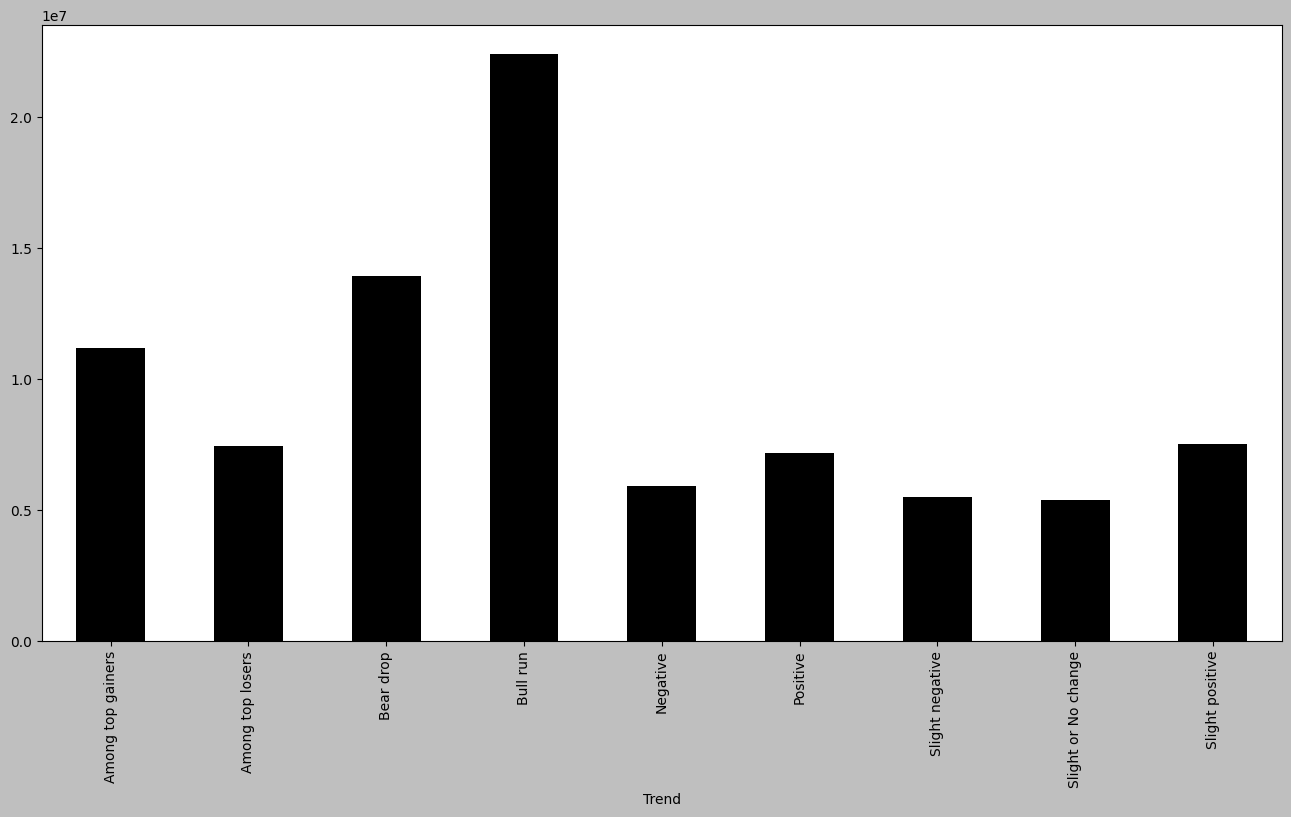

In [10]:
plt.figure(figsize=(16,8))
df.groupby(["Trend"])["Total Traded Quantity"].mean().plot.bar()

<Axes: xlabel='Trend'>

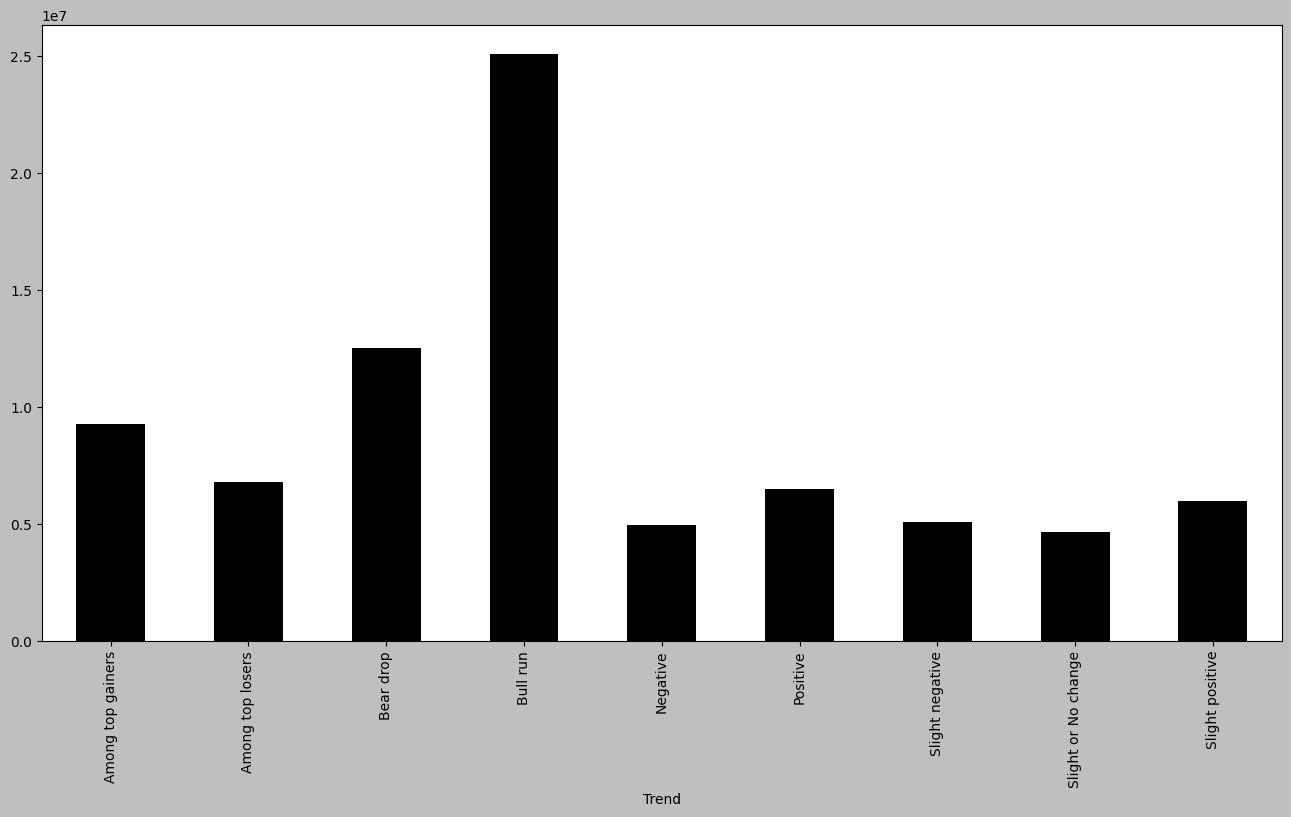

In [11]:
plt.figure(figsize=(16,8))
df.groupby(["Trend"])["Total Traded Quantity"].median().plot.bar()

## Query 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this
case, it'd return a frequency plot of various values of percentage changes .

(array([  6.,   8.,  16.,  67., 156., 140.,  64.,  22.,   9.,   5.]),
 array([-9.76297968, -7.80793451, -5.85288934, -3.89784417, -1.942799  ,
         0.01224618,  1.96729135,  3.92233652,  5.87738169,  7.83242686,
         9.78747204]),
 <BarContainer object of 10 artists>)

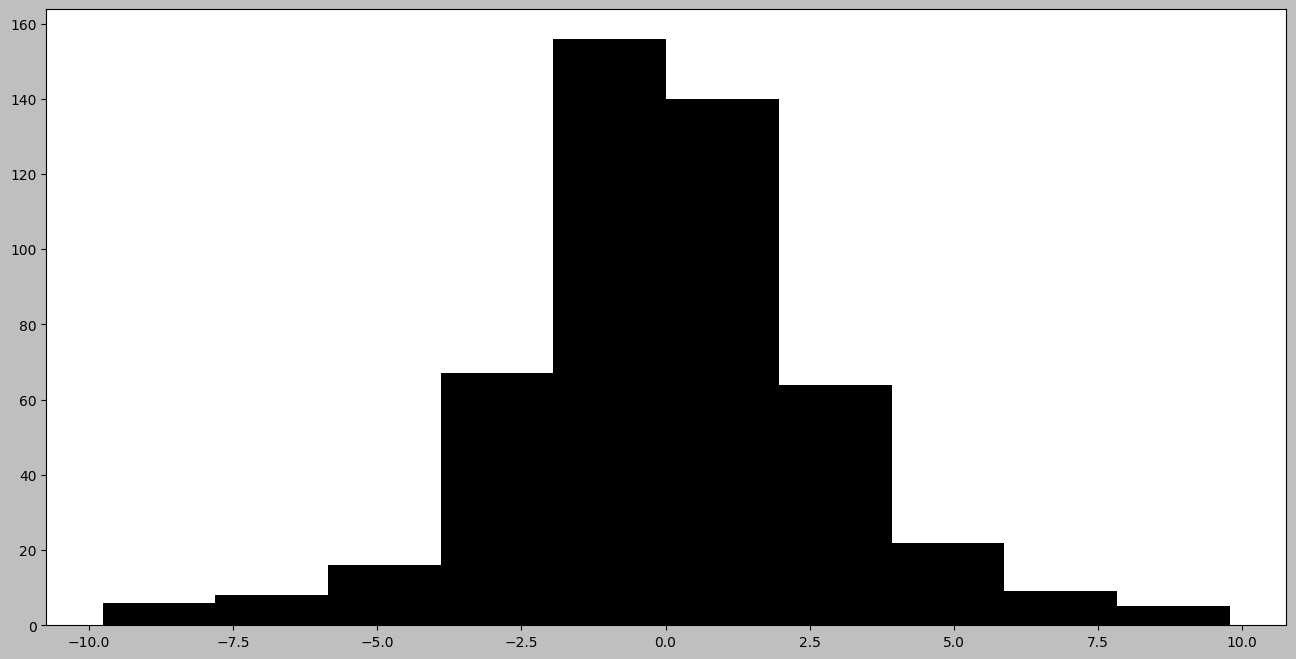

In [12]:
plt.figure(figsize=(16,8))
plt.hist(df["Day_Perc_Change"])

## Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation
is performed on the percentage change of the stock price instead of the stock price.
Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column
has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This
dataframe should hence have five columns. Rename each column to the name of the stock that
is contained in the column. Create a new dataframe which is a percentage change of the values
in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This
is extremely useful for a fund manager to design a diversified portfolio.

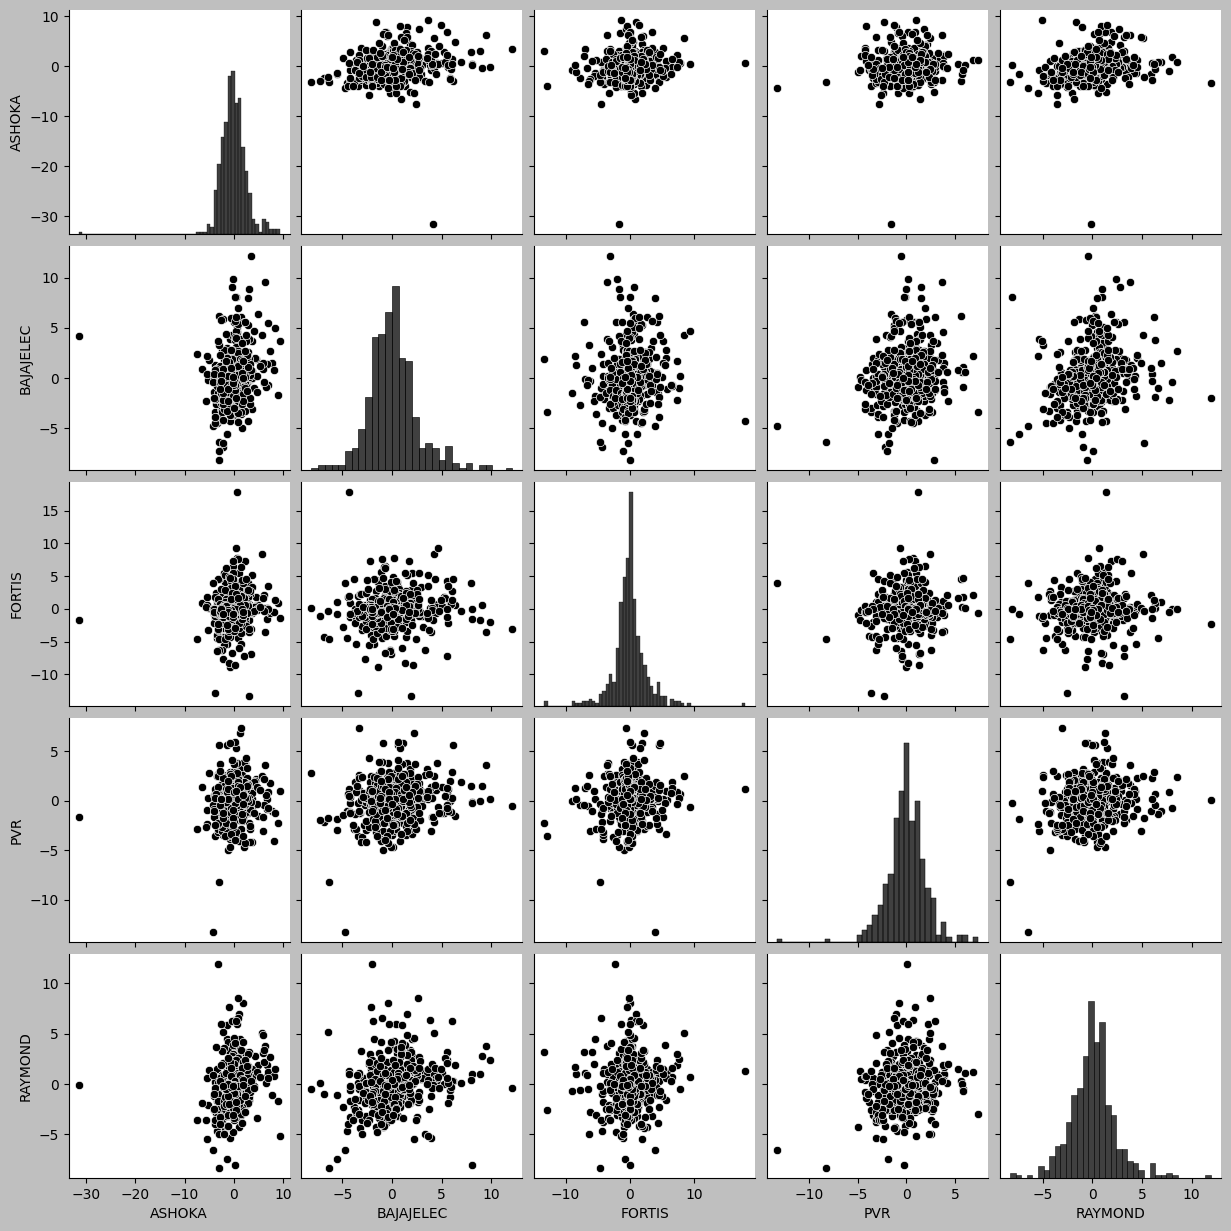

In [13]:
df1=pd.read_csv("ASHOKA.csv")
df2=pd.read_csv("BAJAJELEC.csv")
df3=pd.read_csv("FORTIS.csv")
df4=pd.read_csv("PVR.csv")
df5=pd.read_csv("RAYMOND.csv")

df1=df1[df1["Series"].isin(["EQ"])]
df2=df2[df2["Series"].isin(["EQ"])]
df3=df3[df3["Series"].isin(["EQ"])]
df4=df4[df4["Series"].isin(["EQ"])]
df5=df5[df5["Series"].isin(["EQ"])]

df6=pd.DataFrame()
df6["ASHOKA"]=df1["Close Price"]
df6["BAJAJELEC"]=df2["Close Price"]
df6["FORTIS"]=df3["Close Price"]
df6["PVR"]=df4["Close Price"]
df6["RAYMOND"]=df5["Close Price"]

df7=pd.DataFrame()
df7["ASHOKA"]=df6["ASHOKA"].pct_change()*100
df7["BAJAJELEC"]=df6["BAJAJELEC"].pct_change()*100
df7["FORTIS"]=df6["FORTIS"].pct_change()*100
df7["PVR"]=df6["PVR"].pct_change()*100
df7["RAYMOND"]=df6["RAYMOND"].pct_change()*100
df7.dropna(axis=0, how="any", inplace=True)

sns.pairplot(df7)

## Query 2.7
Volatility is the change in variance in the returns of a stock over a specific period of time.You have already calculated the percentage changes in several stock prices. Calculate the 7 day
rolling average of the percentage change of any of the stock prices, then compute the standard
deviation (which is the square root of the variance) and plot the values.

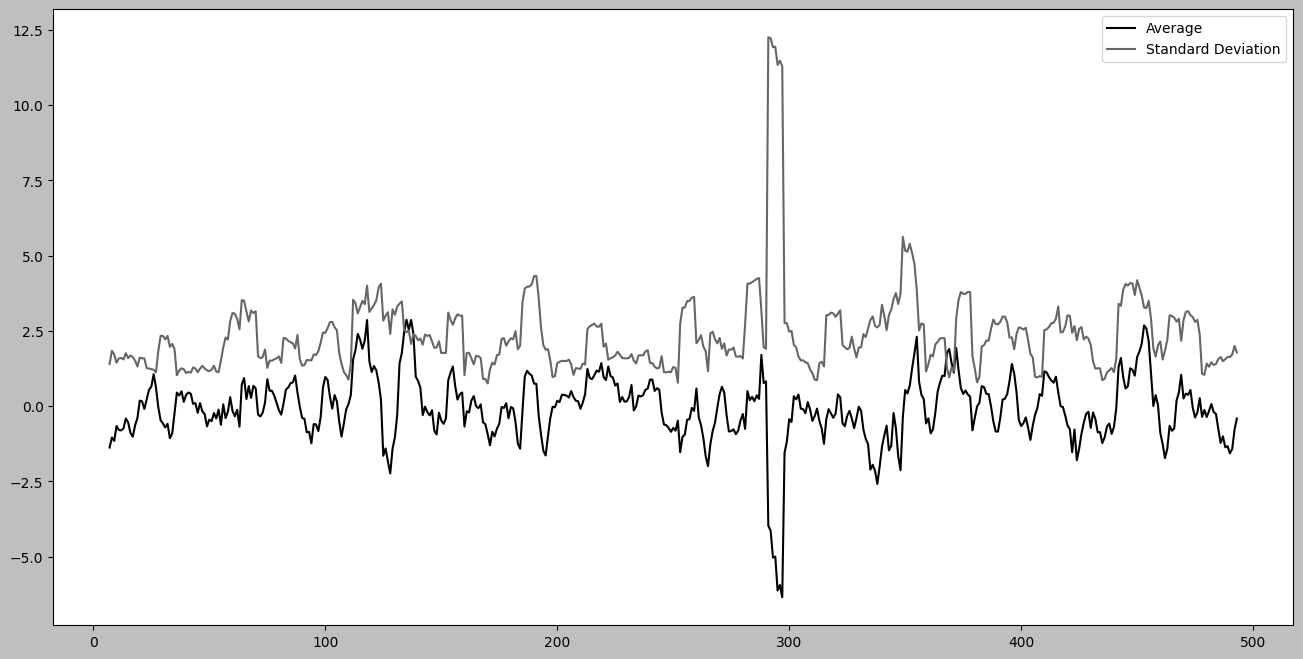

In [14]:
rolling_std=df7["ASHOKA"].rolling(7).std()
rolling_avg=df7["ASHOKA"].rolling(7).mean()

plt.figure(figsize=(16,8))
plt.plot(rolling_avg, label="Average")
plt.plot(rolling_std, label="Standard Deviation")
plt.legend()
plt.show()

## Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful
indicator known as 'Beta'

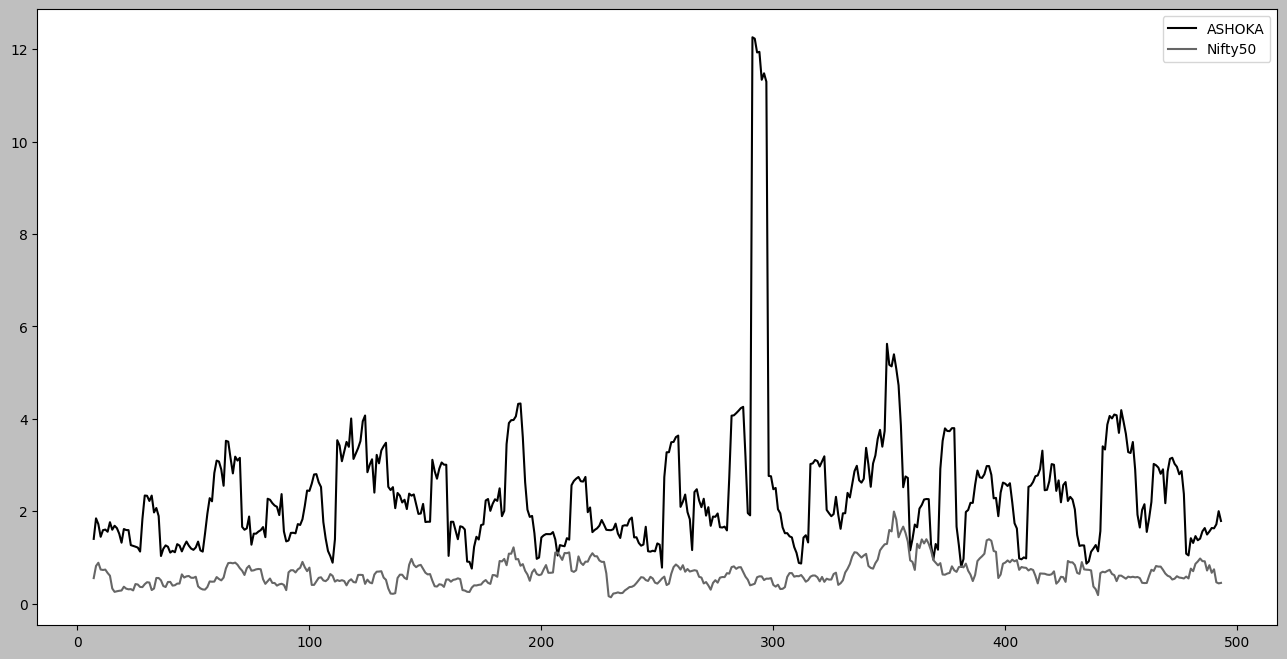

In [15]:
df8=pd.read_csv("Nifty50.csv")
df8["Day_Perc_Change"]=df8["Close"].pct_change(1)
df8["Day_Perc_Change"]=df8["Day_Perc_Change"]*100
rolling_std_50=df8["Day_Perc_Change"].rolling(7).std()
rolling_std_50.tail()

plt.figure(figsize=(16,8))
plt.plot(rolling_std, label="ASHOKA")
plt.plot(rolling_std_50, label="Nifty50")
plt.legend()
plt.show()

## Query 2.9
Plot the 21 day and 34 day Moving average with the average price and decide a Call !
Call should be buy whenever the smaller moving average (21) crosses over longer moving
average (34) AND the call should be sell whenever smaller moving average crosses under
longer moving average.
One of the most widely used technical indicators.

In [16]:
df.head()

,index,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-16,1,NCC,EQ,97.35,98.15,100.80,97.10,100.60,100.40,99.01,8251673,8.170074e+08,28908,2698728,32.71,5,2017,8.233794e+08,3.133025,Among top gainers
2017-05-17,2,NCC,EQ,100.40,100.95,103.65,100.10,101.35,101.45,102.05,9866001,1.006803e+09,40313,3276414,33.21,5,2017,1.006497e+09,1.045817,Positive
2017-05-18,3,NCC,EQ,101.45,99.80,100.85,96.55,96.90,97.00,98.80,4163676,4.113649e+08,18977,1196998,28.75,5,2017,4.131061e+08,-4.386397,Among top losers
2017-05-19,4,NCC,EQ,97.00,97.80,99.25,94.25,95.70,95.45,96.53,3782348,3.651142e+08,19517,706203,18.67,5,2017,3.687789e+08,-1.597938,Negative
2017-05-22,5,NCC,EQ,95.45,96.00,97.95,94.65,95.00,95.25,96.56,3829849,3.698111e+08,16697,1116014,29.14,5,2017,3.691974e+08,-0.209534,Slight or No change


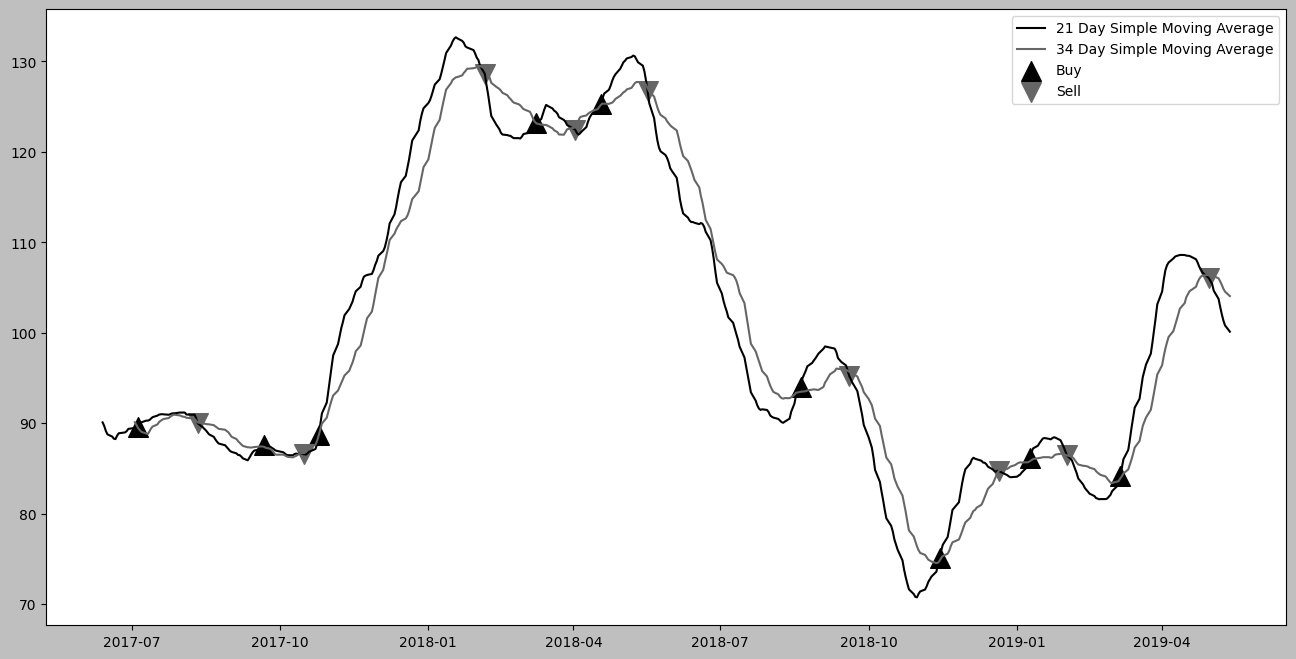

In [17]:
df["21_moving_avg"]=df["Average Price"].rolling(21).mean()
df["34_moving_avg"]=df["Average Price"].rolling(34).mean()

import numpy as np
df["point"]=0
df["point"][21:]=np.where(df["21_moving_avg"][21:]>df["34_moving_avg"][21:],1,0)
df["point"]=df["point"].diff()

plt.figure(figsize=(16,8))
plt.plot(df["21_moving_avg"], label="21 Day Simple Moving Average")
plt.plot(df["34_moving_avg"], label="34 Day Simple Moving Average")
plt.scatter(df.loc[df.point==1].index, df["21_moving_avg"][df.point==1.0], marker="^", s=200, label="Buy")
plt.scatter(df.loc[df.point==-1].index, df["21_moving_avg"][df.point==-1], marker="v", s=200, label="Sell")
plt.legend()
plt.show()

## Query 2.10
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average. The bollinger bands comprise the following data points-
The 14 day rolling mean of the closing price (we call  it the average)
Upper band which is the rolling mean + 2 standard deviations away from the average.
Lower band which is the rolling mean - 2 standard deviations away from the average.
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands.

In [18]:
df.head()

,index,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend,21_moving_avg,34_moving_avg,point
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-16,1,NCC,EQ,97.35,98.15,100.80,97.10,100.60,100.40,99.01,...,2698728,32.71,5,2017,8.233794e+08,3.133025,Among top gainers,NaN,NaN,NaN
2017-05-17,2,NCC,EQ,100.40,100.95,103.65,100.10,101.35,101.45,102.05,...,3276414,33.21,5,2017,1.006497e+09,1.045817,Positive,NaN,NaN,0.0
2017-05-18,3,NCC,EQ,101.45,99.80,100.85,96.55,96.90,97.00,98.80,...,1196998,28.75,5,2017,4.131061e+08,-4.386397,Among top losers,NaN,NaN,0.0
2017-05-19,4,NCC,EQ,97.00,97.80,99.25,94.25,95.70,95.45,96.53,...,706203,18.67,5,2017,3.687789e+08,-1.597938,Negative,NaN,NaN,0.0
2017-05-22,5,NCC,EQ,95.45,96.00,97.95,94.65,95.00,95.25,96.56,...,1116014,29.14,5,2017,3.691974e+08,-0.209534,Slight or No change,NaN,NaN,0.0


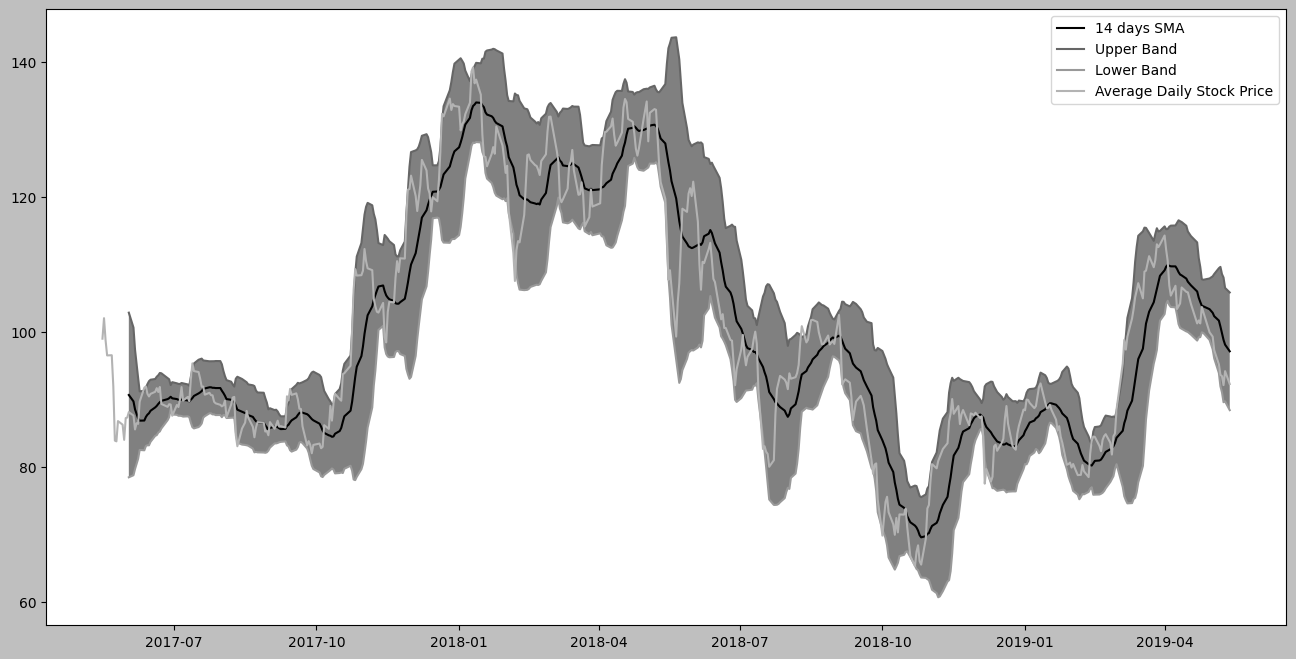

In [19]:
df["14 day SMA"]=df["Close Price"].rolling(14).mean()
df["std deviation"]=df["Close Price"].rolling(14).std()
df["std deviation"]=df["std deviation"]*2
df["upper band"]=df["14 day SMA"]+df["std deviation"]
df["lower band"]=df["14 day SMA"]-df["std deviation"]
df[["14 day SMA","upper band","lower band"]].tail()

plt.figure(figsize=(16,8))
plt.plot(df["14 day SMA"], label="14 days SMA")
plt.plot(df["upper band"], label="Upper Band")
plt.plot(df["lower band"], label="Lower Band")
plt.plot(df["Average Price"], label="Average Daily Stock Price")

plt.fill_between(df.index, df["lower band"], df["upper band"],  where=df["upper band"]>=df["14 day SMA"],facecolor="grey", interpolate=True)

plt.legend()
plt.show()

### Explaination:
A Bollinger Band is a technical analysis tool defined by a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the security's price, but can be adjusted to user preferences. Bollinger Bands were developed and copyrighted by famous technical trader John Bollinger,

In the chart depicted above, Bollinger Bands bracket the 14-day SMA of the stock with an upper and lower band along with the daily movements of the stock's price. Because standard deviation is a measure of volatility, when the markets become more volatile the bands widen; during less volatile periods, the bands contract.

In [20]:
df.drop(df[["Month","Year","VWAP","Day_Perc_Change","21_moving_avg","34_moving_avg","point","std deviation"]], axis = 1, inplace = True)

In [21]:
#df.to_csv("week3.csv", index=False)
print("Exported")

Exported
